In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


---

### First lets import the initial datasets produced by just blindly matching up trolley runs

---

In [60]:
trolleyRuns_initial = []

with open("./data/datasets_fromProductionScript.txt") as file:
    for i, row in enumerate(file):
        if(i < 10):
            print(row)
        row = row.rstrip()
        #print(row)
        if("Trolley " in row):
            rowraw = row.split(" from ")[1].split(" ")
            startDate = rowraw[0]+" "+rowraw[1]
            endDate = rowraw[0]+" "+rowraw[3]
            #print(startDate, endDate)
        if("runs:" in row):
            rowraw = row.split(" ")
            fieldRunStart = rowraw[2].rstrip(",")
            fieldRunEnd = rowraw[4].rstrip(",")
        if("production:" in row):
            rowraw = row.split(" ")
            #print(rowraw)
            mainRunStart = rowraw[4].rstrip()
            mainRunEnd = rowraw[5].rstrip()
            trolleyRuns_initial.append([startDate, endDate, int(mainRunStart), int(mainRunEnd), int(fieldRunStart), int(fieldRunEnd)])

Trolley run from 02/06/2018 16:21:03 to 09:01:36

runs: field 2728 to 2765, main 11254 to 11365 

Last/First runs for production: 11253 11366

 

Trolley run from 02/07/2018 17:53:59 to 22:41:37

runs: field 2773 to 2800, main 11383 to 11457 

Last/First runs for production: 11382 11458

 

Trolley run from 02/07/2018 23:12:04 to 00:30:50

runs: field 2805 to 2812, main 11460 to 11460 



In [66]:
datasets_initial = []
for i, rowi in enumerate(trolleyRuns_initial):
    if(i == len(trolleyRuns_initial) - 1):
        j = i
    else:
        j = i+1
    rowj = trolleyRuns_initial[j]
    toappend=[ rowi[1],
              rowj[0],
              rowi[3],
              rowj[2],
              rowi[5],
              rowj[4]
             ]
    datasets_initial.append(toappend)

In [67]:
datasets_initial[0]

['02/06/2018 09:01:36', '02/07/2018 17:53:59', 11366, 11382, 2765, 2773]

In [68]:
#print(datasets_initial)

names=['startDate', 'endDate', 'mainRunStart', 'mainRunEnd', 'fieldRunStart', 'fieldRunEnd']
types=[str, str, int, int, int, int]
typeDict={x:y for (x,y) in zip(names,types)}

df = pandas.DataFrame(datasets_initial, columns=names)
df['startDate'] = pandas.to_datetime(df['startDate'])
df['endDate'] = pandas.to_datetime(df['endDate'])
print(df.dtypes)

df = df.loc[df['mainRunStart'] > 30000]

df.head()

startDate        datetime64[ns]
endDate          datetime64[ns]
mainRunStart              int64
mainRunEnd                int64
fieldRunStart             int64
fieldRunEnd               int64
dtype: object


,startDate,endDate,mainRunStart,mainRunEnd,fieldRunStart,fieldRunEnd
122,2019-11-24 12:10:04,2019-11-27 07:59:19,30086,30212,8690,8708
123,2019-11-27 10:53:33,2019-11-29 18:41:30,30247,30301,8714,8746
124,2019-11-29 21:29:53,2019-12-03 09:20:29,30311,30386,8749,8796
125,2019-12-03 11:33:29,2019-12-06 10:22:15,30394,30489,8798,8841
126,2019-12-06 13:23:22,2019-12-09 15:54:27,30493,30672,8848,8877


In [69]:
df.describe()

,mainRunStart,mainRunEnd,fieldRunStart,fieldRunEnd
count,45.000000,45.000000,45.000000,45.000000
mean,32667.377778,32732.288889,9439.911111,9467.177778
std,1448.896732,1433.039754,460.910355,459.372610
min,30086.000000,30212.000000,8690.000000,8708.000000
25%,31657.000000,31711.000000,9071.000000,9089.000000
50%,32707.000000,32781.000000,9409.000000,9453.000000
75%,33841.000000,33902.000000,9813.000000,9844.000000
max,34924.000000,34921.000000,10227.000000,10223.000000


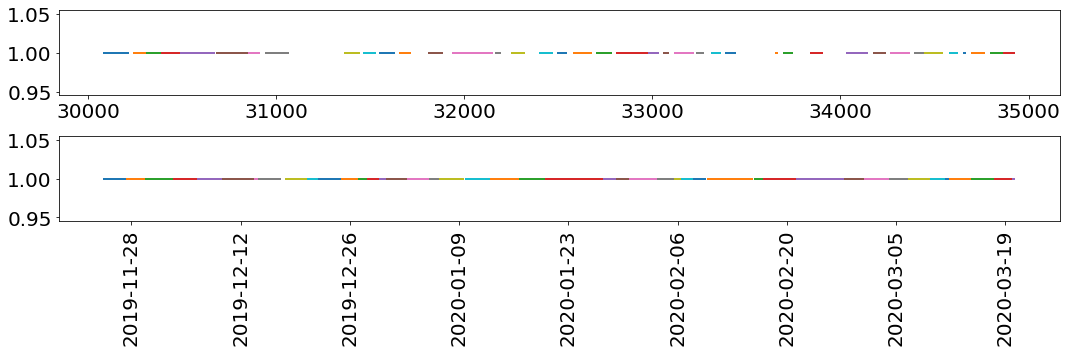

In [70]:
fig,ax = plt.subplots(2,1,figsize=(15,5))
for i, row in df.iterrows():
    ax[1].plot([row['startDate'], row['endDate']], [1,1],linewidth=2)
    ax[0].plot([row['mainRunStart'], row['mainRunEnd']], [1,1],linewidth=2)


plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [115]:
numberOfSubruns = []

with open("./data/numberOfSubruns_run3_list.txt") as file:
    for row in file:
        ding = [int(x.strip(",")) for x in row.strip("[").strip(']\n').strip('\n').split(" ")[1:-1]]
        #print(ding)
        numberOfSubruns.append(ding)

dfn = pandas.DataFrame([x for x in zip(*numberOfSubruns)], columns=['run', 'nsubruns'])

In [126]:
runs = []
for i, rowi in df.iterrows():
    dfn_i = (dfn.loc[dfn['run'] >= rowi['mainRunStart']]
             .loc[dfn['run'] <= rowi['mainRunEnd']]
             .loc[dfn['nsubruns'] >= 100]
            )
    if(dfn_i.size > 0):
        dfn_i = dfn_i.sample(3, random_state=12345, replace=True)

    #print(dfn_i.describe())
    for j, rowj in dfn_i.iterrows():
        runs.append(rowj['run'])
    
runs=list(set(runs))
print(runs)

[30208, 33282, 34324, 34844, 34335, 34849, 34339, 34854, 33319, 32296, 33320, 30252, 32303, 30770, 30771, 32306, 33332, 30776, 30292, 30298, 34912, 33893, 34917, 32873, 33898, 31851, 34921, 33901, 33395, 31860, 33396, 33399, 31868, 34435, 34440, 34444, 30354, 30359, 30362, 31408, 31413, 31416, 30911, 32450, 32458, 32462, 34517, 34524, 32992, 32993, 34528, 32997, 31471, 30459, 30470, 30475, 30995, 34582, 31511, 34584, 31001, 34587, 31516, 31007, 32031, 33065, 33066, 34094, 34100, 33077, 34103, 31593, 31599, 31609, 33660, 32126, 33663, 32129, 34183, 32648, 30089, 34184, 34187, 32656, 33172, 32667, 33179, 33183, 33705, 31658, 31659, 33708, 32173, 31663, 32176, 34745, 30651, 32188, 34751, 30659, 34755, 30665, 33743, 33241, 33242, 33245, 32745, 32751, 32759]


In [129]:
len(runs)/4

27.25

In [127]:
datasetDefinition = createSamDataset("run3_trendPlots_nearlineProcessing_midas", runs, "file_name like %_000%.mid")
print(datasetDefinition)

samweb -e gm2 create-definition run3_trendPlots_nearlineProcessing_midas " ( ( run_number = 30208 ) or ( run_number = 33282 ) or ( run_number = 34324 ) or ( run_number = 34844 ) or ( run_number = 34335 ) or ( run_number = 34849 ) or ( run_number = 34339 ) or ( run_number = 34854 ) or ( run_number = 33319 ) or ( run_number = 32296 ) or ( run_number = 33320 ) or ( run_number = 30252 ) or ( run_number = 32303 ) or ( run_number = 30770 ) or ( run_number = 30771 ) or ( run_number = 32306 ) or ( run_number = 33332 ) or ( run_number = 30776 ) or ( run_number = 30292 ) or ( run_number = 30298 ) or ( run_number = 34912 ) or ( run_number = 33893 ) or ( run_number = 34917 ) or ( run_number = 32873 ) or ( run_number = 33898 ) or ( run_number = 31851 ) or ( run_number = 34921 ) or ( run_number = 33901 ) or ( run_number = 33395 ) or ( run_number = 31860 ) or ( run_number = 33396 ) or ( run_number = 33399 ) or ( run_number = 31868 ) or ( run_number = 34435 ) or ( run_number = 34440 ) or ( run_number 

In [132]:
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]
        
for i, runsi in enumerate(chunks(runs, 28)):
    #print(runsi)
    ding = createSamDataset("run3_trendPlots_nearlineProcessing_midas_first100_"+str(i), runsi, "file_name like %_000%.mid")
    print(ding)

samweb -e gm2 create-definition run3_trendPlots_nearlineProcessing_midas_first100_0 " ( ( run_number = 30208 ) or ( run_number = 33282 ) or ( run_number = 34324 ) or ( run_number = 34844 ) or ( run_number = 34335 ) or ( run_number = 34849 ) or ( run_number = 34339 ) or ( run_number = 34854 ) or ( run_number = 33319 ) or ( run_number = 32296 ) or ( run_number = 33320 ) or ( run_number = 30252 ) or ( run_number = 32303 ) or ( run_number = 30770 ) or ( run_number = 30771 ) or ( run_number = 32306 ) or ( run_number = 33332 ) or ( run_number = 30776 ) or ( run_number = 30292 ) or ( run_number = 30298 ) or ( run_number = 34912 ) or ( run_number = 33893 ) or ( run_number = 34917 ) or ( run_number = 32873 ) or ( run_number = 33898 ) or ( run_number = 31851 ) or ( run_number = 34921 ) or ( run_number = 33901 )   and ( file_name like %_000%.mid ) ) and data_tier raw " 
samweb -e gm2 create-definition run3_trendPlots_nearlineProcessing_midas_first100_1 " ( ( run_number = 33395 ) or ( run_number =

In [139]:
for i in range(4):
    print("./gridSetupAndSubmitGM2Data.sh --daq --full --fhicl nearlineProcessing_run3.fcl --sam-dataset   run3_trendPlots_nearlineProcessing_midas_first100_"+str(i)+"  --njobs 25 --output-dir /pnfs/GM2/scratch/users/labounty/gridoutput --localArea --memory 4 --lifetime 24h --sam-max-files 250 --noifdh_art --onebyone ")

./gridSetupAndSubmitGM2Data.sh --daq --full --fhicl nearlineProcessing_run3.fcl --sam-dataset   run3_trendPlots_nearlineProcessing_midas_first100_0  --njobs 25 --output-dir /pnfs/GM2/scratch/users/labounty/gridoutput --localArea --memory 4 --lifetime 24h --sam-max-files 250 --noifdh_art --onebyone 
./gridSetupAndSubmitGM2Data.sh --daq --full --fhicl nearlineProcessing_run3.fcl --sam-dataset   run3_trendPlots_nearlineProcessing_midas_first100_1  --njobs 25 --output-dir /pnfs/GM2/scratch/users/labounty/gridoutput --localArea --memory 4 --lifetime 24h --sam-max-files 250 --noifdh_art --onebyone 
./gridSetupAndSubmitGM2Data.sh --daq --full --fhicl nearlineProcessing_run3.fcl --sam-dataset   run3_trendPlots_nearlineProcessing_midas_first100_2  --njobs 25 --output-dir /pnfs/GM2/scratch/users/labounty/gridoutput --localArea --memory 4 --lifetime 24h --sam-max-files 250 --noifdh_art --onebyone 
./gridSetupAndSubmitGM2Data.sh --daq --full --fhicl nearlineProcessing_run3.fcl --sam-dataset   run3